# Advanced Statistics for Physics Analysis
## R Lab 03

### Student: Toso Simone (2095484)

In [2]:
library(tidyverse)

In [4]:
#Import GoFKernel, which allows to invert the cumulative function (useful for finding confidence intervals)
library(GoFKernel)

### Ex.1 
Study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial.
Assume the following priors:
 - Uniform
 - Jeffrey
 - Step function

#### a) Plot the posterior distribution and summarize the results by computing the first two moments

In [5]:
r <- 7
n <- 20
xs = seq(from = 0, to = 1, length.out = 1001)

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


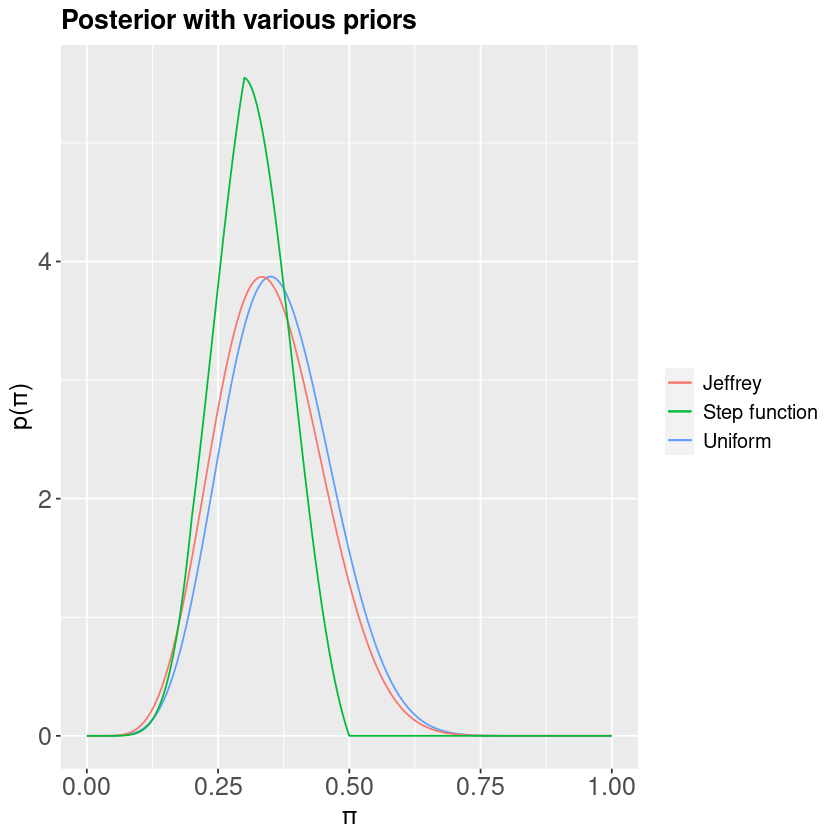

In [6]:
#Uniform
posterior_uniform <- function(x){
    return(x**r*(1-x)**(n-r))
}

posterior_uniform <- Vectorize(posterior_uniform)


#With Jeffrey's prior
posterior_jeff <- function(x){
    return(x**r*(1-x)**(n-r)*1/sqrt(x))
}

posterior_jeff <- Vectorize(posterior_jeff)

#Step function
step_function <- function(x){
    if(x >= 0 && x<=0.2)
        {
        return(x);
    }
    else if(x > 0.2 && x <=0.3){
        return(0.2)
    }
    else if(x > 0.3 && x<=0.5){
        return(0.5-x)
    }
    else{
        return(0.)
    }
}

step_function <- Vectorize(step_function)

posterior_step <- function(x){
    return(step_function(x)*x**r*(1-x)**(n-r))
}
    
posterior_step <- Vectorize(posterior_step)
    
Z_step = integrate(posterior_step,0,1)
Z_jeff = integrate(posterior_jeff,0,1)
Z_uniform = integrate(posterior_uniform,0,1)
    

#Make plots
theme <- theme(legend.text = element_text(size = 12), axis.title = element_text(size = 15), axis.text = element_text(size = 15), plot.title = element_text(face = "bold", size = 16))
labels <- labs(x = "\u03c0", y = "p(\u03c0)")
    
p <- ggplot()
plot_uniform <- geom_line(mapping = aes(x = xs, y = posterior_uniform(xs)/Z_uniform$value, color = "Uniform"))
plot_jeffrey <- geom_line(mapping = aes(x = xs, y = posterior_jeff(xs)/Z_jeff$value,color = "Jeffrey"))    
plot_step <- geom_line(mapping=aes(x = xs, y = posterior_step(xs)/Z_step$value, color = "Step function"))
p + plot_uniform + plot_jeffrey + plot_step+ ggtitle("Posterior with various priors") + theme + labels + labs(color=NULL)

#### b) Compute a 95% credibility interval and give the results in a summary table

In [7]:
#We want 2.5 < I < 97.5
cumulative_uniform <- function(x){
    return((integrate(posterior_uniform,0,x)$value)/Z_uniform$value)
} 

cumulative_jeffrey <- function(x){
    return((integrate(posterior_jeff,0.00001,x)$value)/Z_jeff$value)
}

cumulative_step <- function(x){
    return((integrate(posterior_step,0,x)$value)/Z_step$value)
}

CI_uniform <- c(inverse(cumulative_uniform, lower = 0, upper = 1)(0.025),inverse(cumulative_uniform, lower = 0, upper = 1)(0.975))
CI_jeffrey <- c(inverse(cumulative_jeffrey, lower = 0, upper = 1)(0.025),inverse(cumulative_jeffrey, lower = 0, upper = 1)(0.975))
CI_step <- c(inverse(cumulative_step, lower = 0, upper = 1)(0.025),inverse(cumulative_step, lower = 0, upper = 1)(0.975))

In [8]:
data.frame(CI_uniform,CI_jeffrey,CI_step, row.names = c("Lower","Upper"))

,CI_uniform,CI_jeffrey,CI_step
,<dbl>,<dbl>,<dbl>
Lower,0.1810694,0.1676551,0.1751487
Upper,0.5696854,0.5566722,0.4471403


#### c) Draw the limits on the plot of the posterior distributions

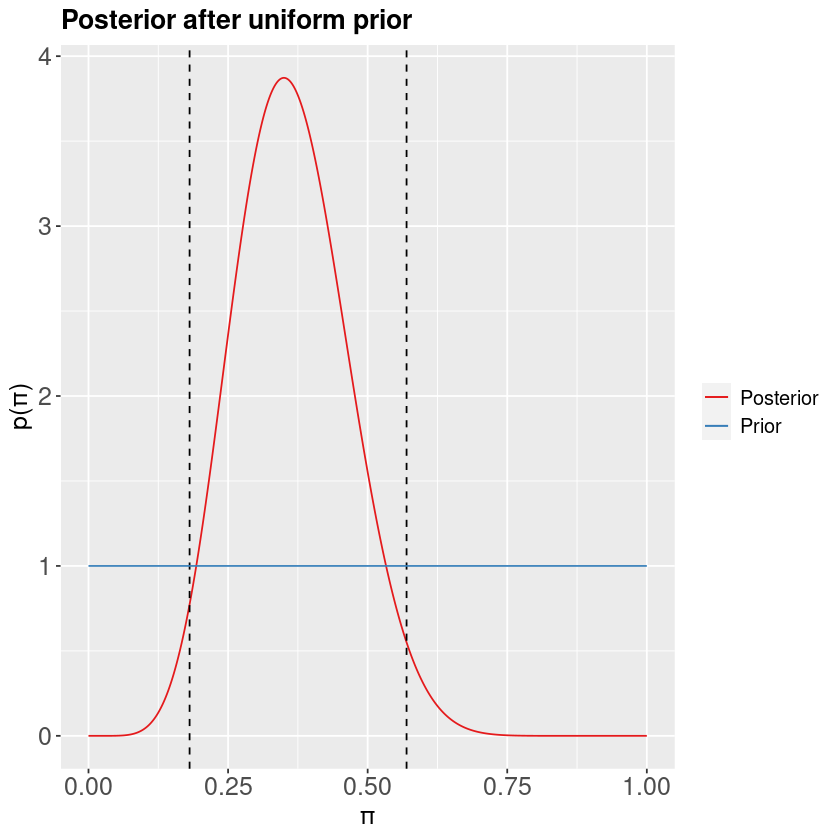

In [9]:
#Uniform prior
p <- ggplot()
plot_uniform <- geom_line(mapping = aes(x = xs, y = posterior_uniform(xs)/Z_uniform$value, color = "Posterior"))

p <- p + plot_uniform +  geom_vline(xintercept = CI_uniform[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_uniform[2], linetype = "dashed", color = "black")
p <- p + geom_line(aes(x = xs, y = rep(1,length(xs)), color = "Prior"))

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior after uniform prior")
p + scale_color_brewer(palette = "Set1")

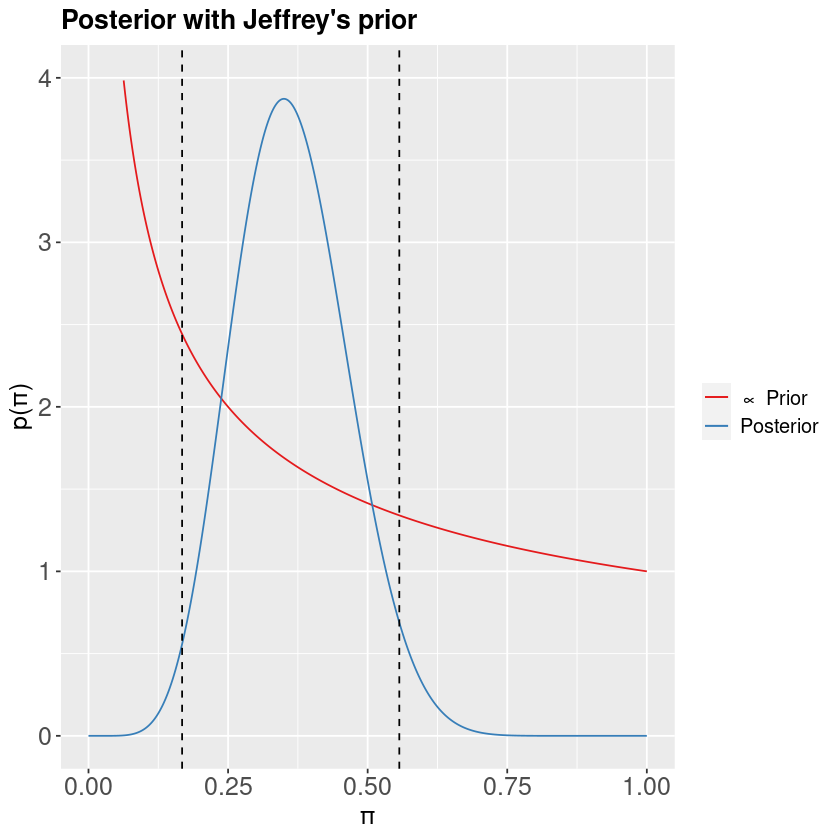

In [10]:
#Jeffrey's prior
p <- ggplot()
plot_jeffrey <- geom_line(mapping = aes(x = xs, y = posterior_jeff(xs)/Z_jeff$value, color = "Posterior"))

p <- p + geom_line(aes(x = xs, y = 1/sqrt(xs), color = "\u221d Prior"))
p <- p + plot_uniform +  geom_vline(xintercept = CI_jeffrey[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_jeffrey[2], linetype = "dashed", color = "black")

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior with Jeffrey's prior")
p + scale_color_brewer(palette = "Set1") + ylim(0,4)

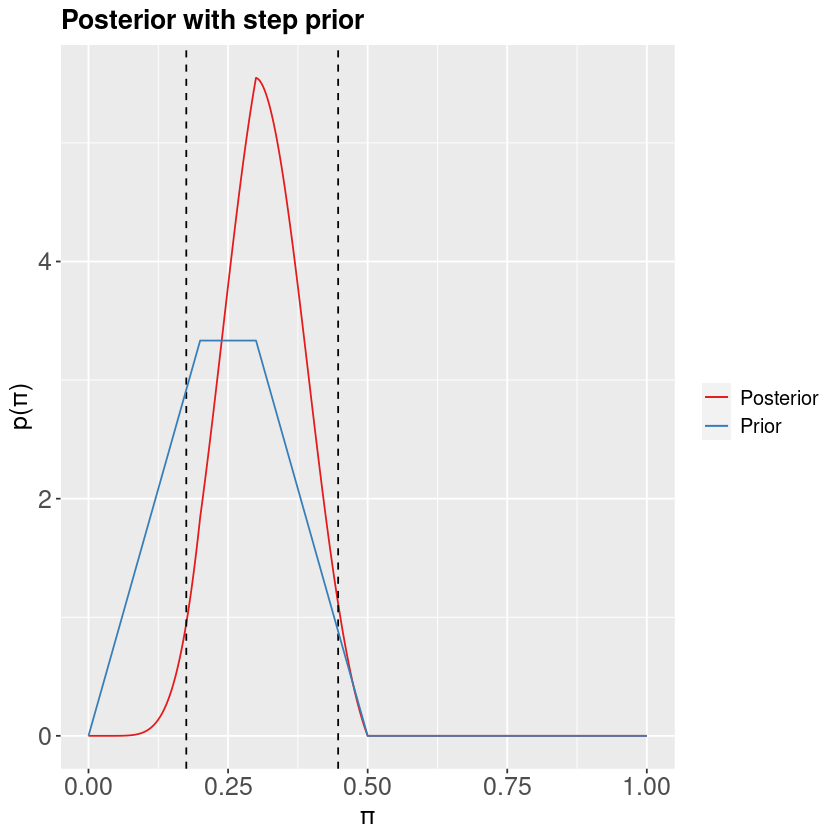

In [11]:
#Step prior
p <- ggplot()
plot_step <- geom_line(mapping = aes(x = xs, y = posterior_step(xs)/Z_step$value, color = "Posterior"))

normalize_step <- integrate(step_function, 0, 1)$value
p <- p + plot_step +  geom_vline(xintercept = CI_step[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_step[2], linetype = "dashed", color = "black")
p <- p + geom_line(aes(x = xs, y = step_function(xs)/normalize_step, color = "Prior"))

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior with step prior")
p + scale_color_brewer(palette = "Set1") 

 ### Ex.2
 Giardia cysts[1] is a parassite that can contaminate food, water, and surfaces, and they can cause
giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person
swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.
A group of researchers, working for a Human Health Department, work for determining the quality
of stream water
They take n = 116 samples of one-liter water from sites identified to have a heavy environmental
impact from birds and waterflow.
Out of these samples, y = 17 samples contained Giard cystis.

Assuming π as the probability that one-liter water sample contains Giardia cystis, find the posterior
distribution for π
#### Assuming a uniform prior distribution

In [12]:
n <- 116 #number of samples
y <- 17 #contaminated samples

Z_uniform <- integrate(function(x) x**17*(1-x)**(116-17), 0, 1)$value
posterior_uniform <- function(x){
    return(x**17*(1-x)**(116-17)/Z_uniform)
}
posterior_uniform <- Vectorize(posterior_uniform)

#### Assuming a Beta(1,4) prior

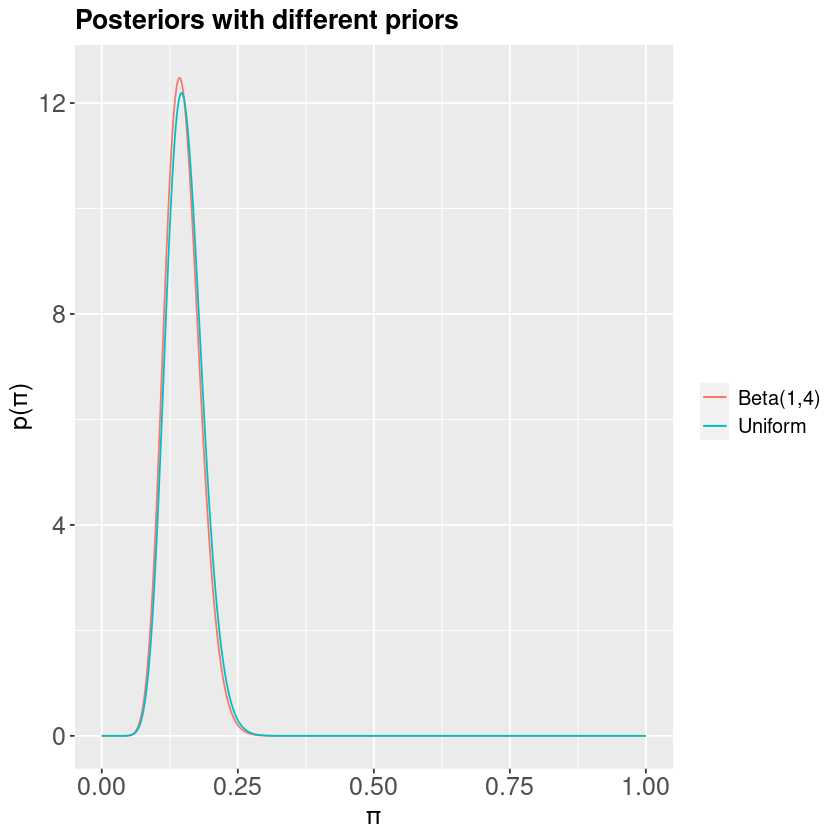

In [13]:
Z_beta <- integrate(function(x) dbeta(x,1,4)*x**17*(1-x)**(116-17), 0, 1)$value
posterior_beta <- function(x){
    return(dbeta(x,1,4,)*x**17*(1-x)**(116-17)/Z_beta)
}
posterior_beta <- Vectorize(posterior_beta) 
ggplot()+geom_line(aes(x=xs,y=posterior_beta(xs), color = "Beta(1,4)")) + geom_line(aes(x=xs,y=posterior_uniform(xs),color="Uniform")) + theme + ggtitle("Posteriors with different priors") + labs(color = NULL, x = "\u03c0", y = "p(\u03c0)")

#### Let's compute the first two moments

In [14]:
#Beta prior
x_beta <- integrate(function(x) x*posterior_beta(x),0,1)$value
x2_beta <- integrate(function(x) x**2*posterior_beta(x),0,1)$value                   

In [15]:
#Uniform prior
x_uniform <- integrate(function(x) x*posterior_uniform(x),0,1)$value
x2_uniform <- integrate(function(x) x**2*posterior_uniform(x),0,1)$value                   

In [16]:
data.frame("Beta" = c(x_beta,x2_beta), "Uniform" = c(x_uniform,x2_uniform), row.names = c("E[\u03c0]","E[\u03c0^2]"))

,Beta,Uniform
,<dbl>,<dbl>
E[π],0.1487604,0.15254242
E[π^2],0.0231676,0.02435551


#### c) Find a normal approximation for the posterior

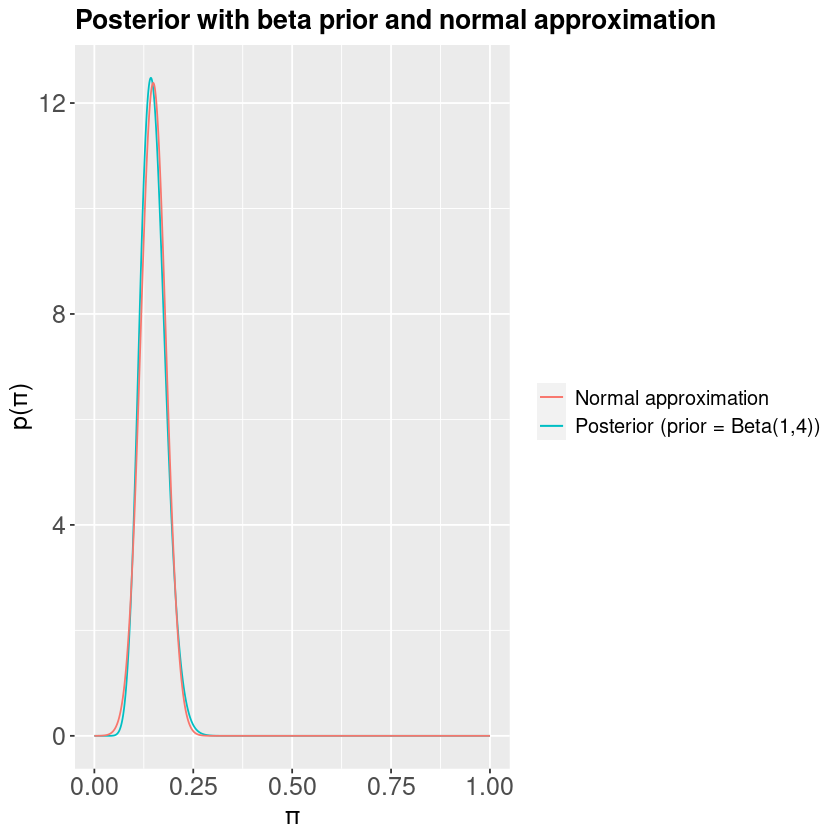

In [17]:
normal_uniform <- dnorm(xs,x_uniform, sqrt(x2_uniform-x_uniform**2))
normal_beta <- dnorm(xs,x_beta,sqrt(x2_beta-x_beta**2))
ggplot()+geom_line(aes(x=xs,y=posterior_beta(xs), color = "Posterior (prior = Beta(1,4))")) + theme + ggtitle("Posterior with beta prior and normal approximation") + labs(color = NULL, x = "\u03c0", y = "p(\u03c0)") + geom_line(aes(xs,normal_beta, color = "Normal approximation"))

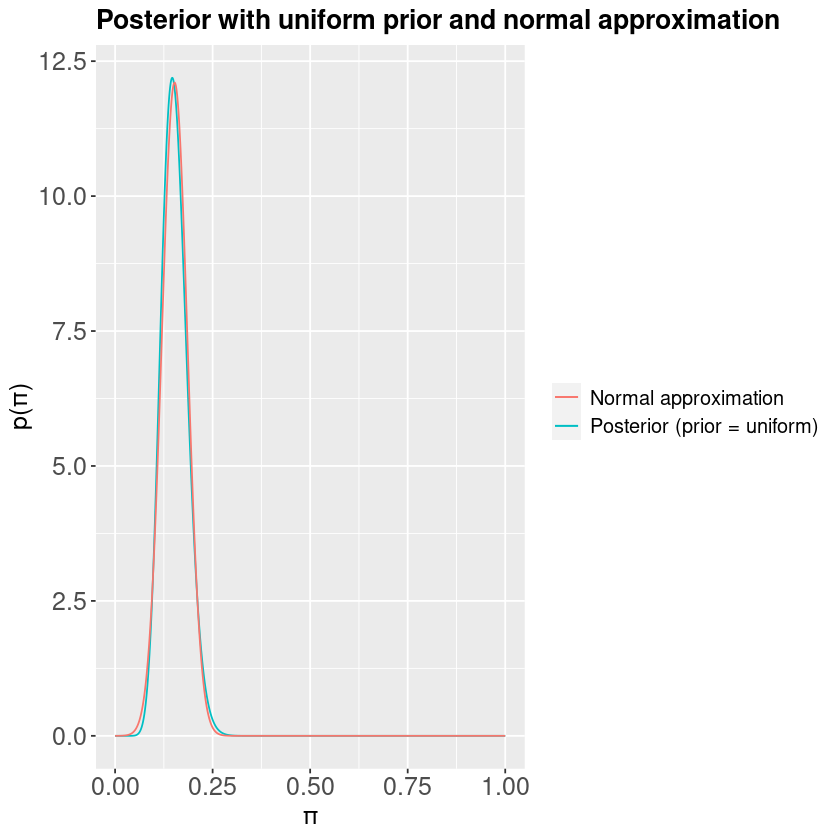

In [18]:
ggplot()+geom_line(aes(x=xs,y=posterior_uniform(xs), color = "Posterior (prior = uniform)")) + theme + ggtitle("Posterior with uniform prior and normal approximation") + labs(color = NULL, x = "\u03c0", y = "p(\u03c0)") + geom_line(aes(xs,normal_uniform, color = "Normal approximation"))

#### d) Compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table

In [19]:
#Uniform prior
cumulative_uniform <- function(x){
    return(integrate(posterior_uniform,0,x)$value)
}

normal_uniform <- function(x){
    return(dnorm(x,x_uniform, sqrt(x2_uniform-x_uniform**2)))
}

cumulative_normal_uniform <- function(x){
    return(integrate(normal_uniform,0,x)$value)
}
 

CI_uniform <- c(inverse(cumulative_uniform, lower = 0, upper = 1)(0.025),inverse(cumulative_uniform, lower = 0, upper = 1)(0.975))
CI_normal_uniform <- c(inverse(cumulative_normal_uniform, lower = 0, upper = 1)(0.025),inverse(cumulative_normal_uniform, lower = 0, upper = 1)(0.975))


In [20]:
#Beta prior
cumulative_beta <- function(x){
    return(integrate(posterior_beta,0,x)$value)
}
normal_beta<- function(x){
    return(dnorm(x,x_beta,sqrt(x2_beta-x_beta**2)))

}

cumulative_normal_beta <- function(x){
    return(integrate(normal_beta,0,x)$value)
}

CI_beta <- c(inverse(cumulative_beta, lower = 0, upper = 1)(0.025),inverse(cumulative_beta, lower = 0, upper = 1)(0.975))
CI_normal_beta <- c(inverse(cumulative_normal_beta, lower = 0, upper = 1)(0.025),inverse(cumulative_normal_beta, lower = 0, upper = 1)(0.975))


In [21]:
#Summary table
df <- t(data.frame(CI_uniform,CI_normal_uniform, CI_beta, CI_normal_beta))
colnames(df) <- c("Lower bound", "Upper bound")
rownames(df) <- c("Uniform prior", "Uniform prior, normal approx.", "Beta prior", "Beta prior, normal approx.")

In [22]:
df

,Lower bound,Upper bound
Uniform prior,0.09377354,0.2224056
"Uniform prior, normal approx.",0.08794216,0.2171669
Beta prior,0.09138988,0.2171084
"Beta prior, normal approx.",0.08563772,0.2118867


#### Add the limits to the plots of the posterior distributions

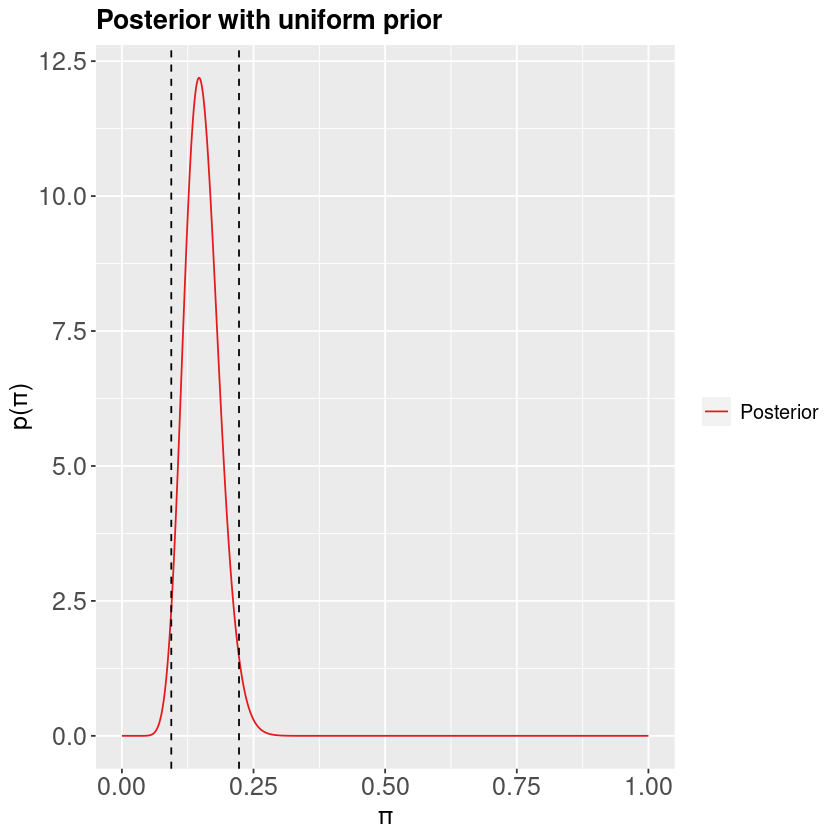

In [23]:
#Uniform prior
p <- ggplot()
plot_uniform <- geom_line(mapping = aes(x = xs, y = posterior_uniform(xs), color = "Posterior"))

p <- p + plot_uniform +  geom_vline(xintercept = CI_uniform[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_uniform[2], linetype = "dashed", color = "black")

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior with uniform prior")
p + scale_color_brewer(palette = "Set1")

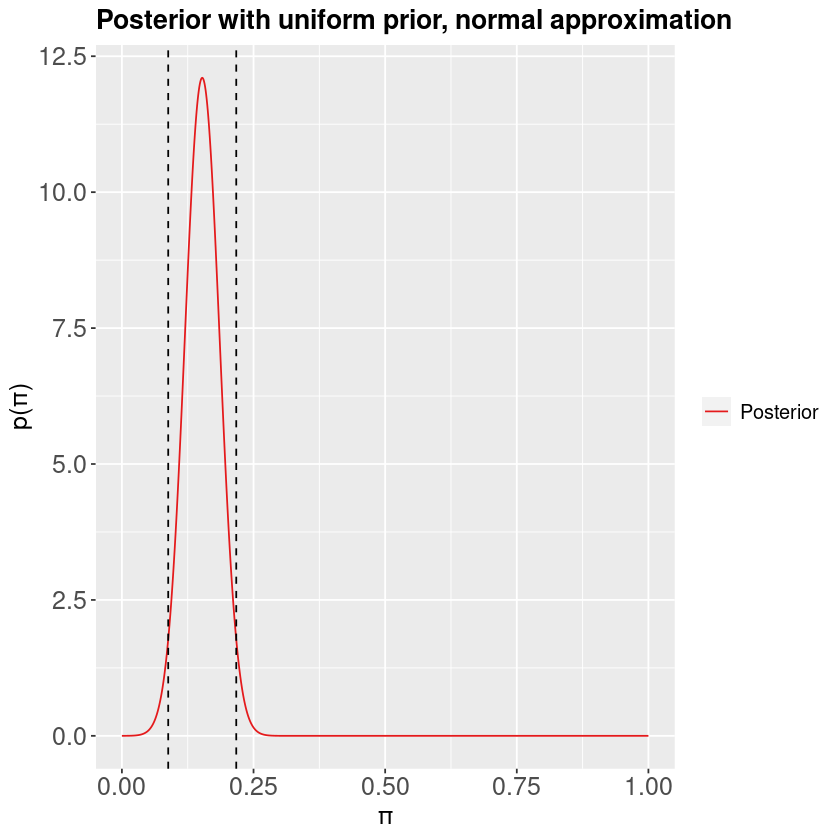

In [24]:
#Uniform prior, normal approximation
p <- ggplot()
plot_uniform_normal <- geom_line(mapping = aes(x = xs, y = normal_uniform(xs), color = "Posterior"))

p <- p + plot_uniform_normal +  geom_vline(xintercept = CI_normal_uniform[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_normal_uniform[2], linetype = "dashed", color = "black")

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior with uniform prior, normal approximation")
p + scale_color_brewer(palette = "Set1")

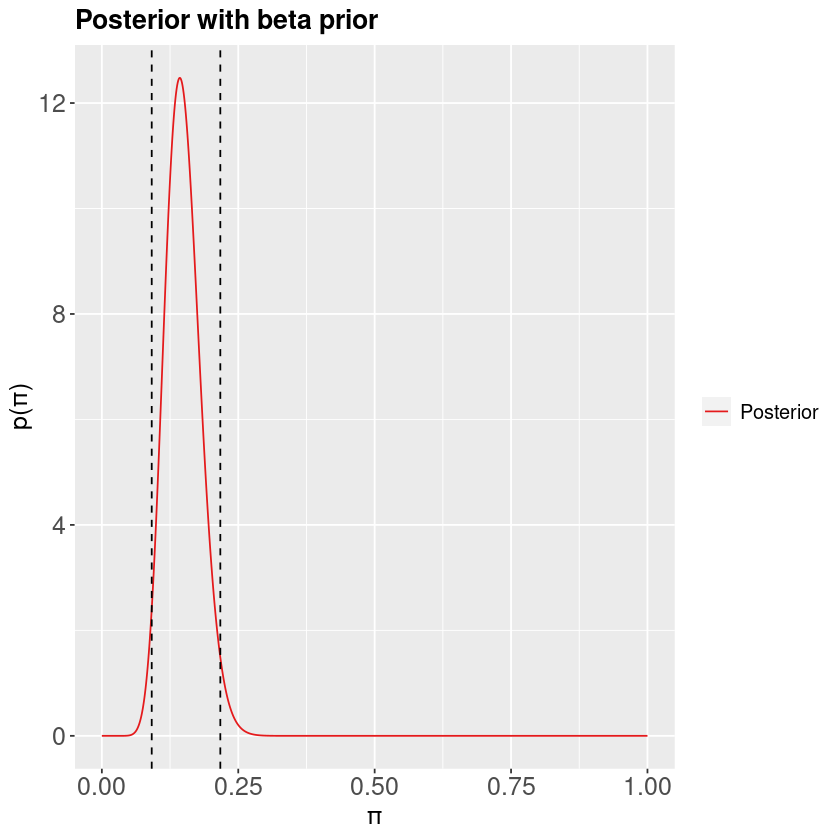

In [25]:
#Beta prior
p <- ggplot()
plot_beta <- geom_line(mapping = aes(x = xs, y = posterior_beta(xs), color = "Posterior"))

p <- p + plot_beta +  geom_vline(xintercept = CI_beta[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_beta[2], linetype = "dashed", color = "black")

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior with beta prior")
p + scale_color_brewer(palette = "Set1")

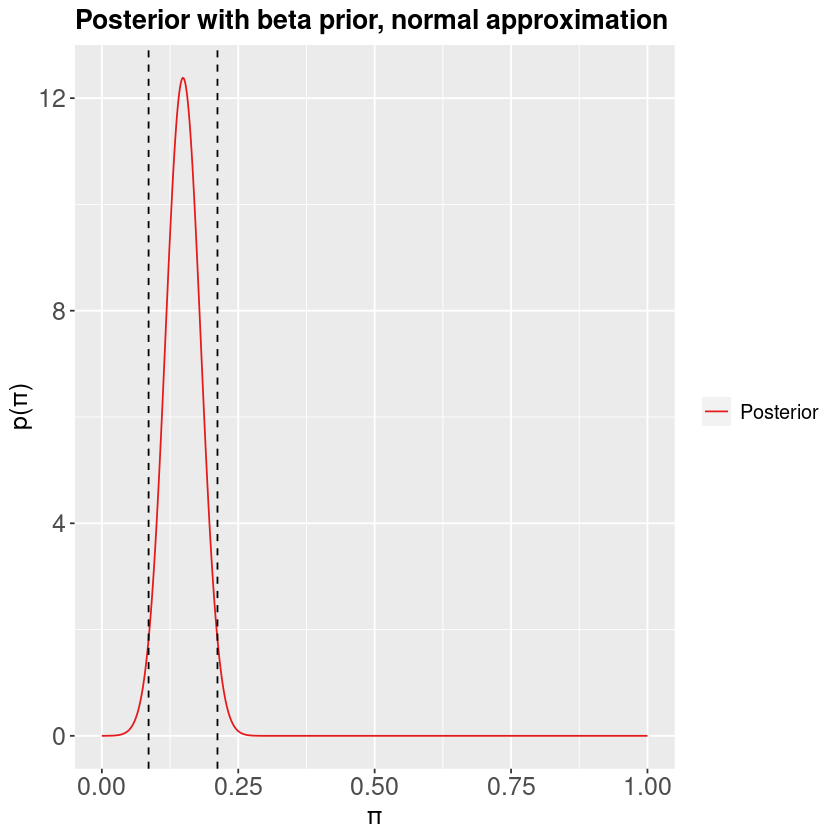

In [26]:
#Beta prior with normal approximation
p <- ggplot()
plot_beta_normal <- geom_line(mapping = aes(x = xs, y = normal_beta(xs), color = "Posterior"))

p <- p + plot_beta_normal +  geom_vline(xintercept = CI_normal_beta[1], linetype = "dashed", color = "black") + geom_vline(xintercept = CI_normal_beta[2], linetype = "dashed", color = "black")

p <- p + theme + labels + labs(color = NULL) +  ggtitle("Posterior with beta prior, normal approximation")
p + scale_color_brewer(palette = "Set1")

### Exercise 3

#### A coin is flipped n = 30 times with the following outcomes:
 [T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H,
H, H]

#### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [27]:
#T = 0, H = 1
tosses <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1)
length(tosses)

[1] 30

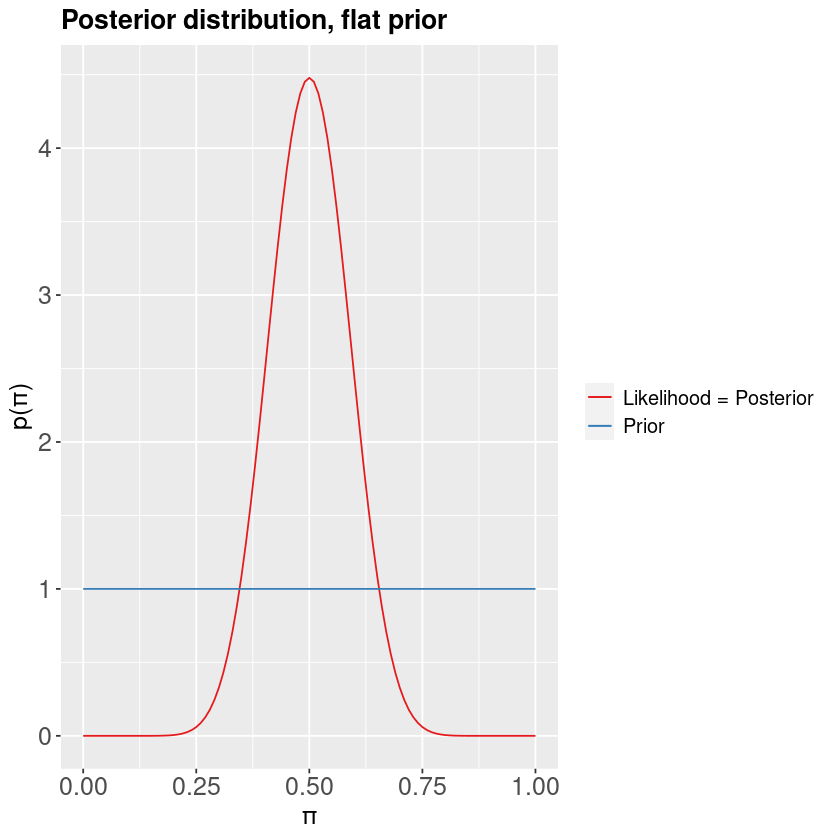

In [28]:
#Flat prior
nHead <- sum(tosses)
nTail <- length(tosses)- sum(tosses)
xs <- seq(from = 0, to = 1, length.out = 101)

#Evaluate posterior
posterior_uniform <- function(x){
    return(x**nHead*(1-x)**nTail)
}
posterior_uniform <- Vectorize(posterior_uniform)

Z <- integrate(posterior_uniform,0,1)$value

#Evaluate likelihood
likelihood <- function(x){
    return(x**nHead*(1-x)**nTail)
}
Z_likelihood <- integrate(likelihood,0,1)$value
likelihood <- Vectorize(likelihood)
                          
like_plot <- geom_line(aes(x = xs, y = likelihood(xs)/Z_likelihood, color = "Likelihood = Posterior"))

ggplot()+  scale_color_brewer(palette = "Set1") + like_plot +  geom_line(aes(x = xs, y = rep(1,length(xs)), color = "Prior")) + theme + labs(x = "\u03c0", y = "p(\u03c0)") + ggtitle("Posterior distribution, flat prior") + labs(color = NULL)

Likelihood and posterior are the same curve, since the prior is simply uniform.

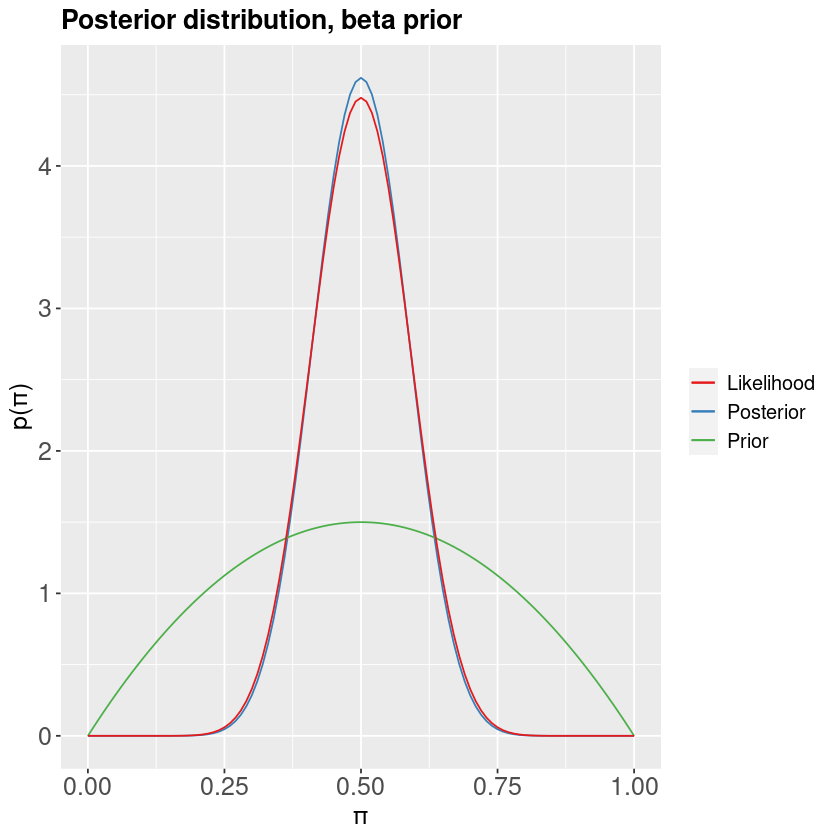

In [29]:
#Beta prior
alpha <- 2
beta <- 2

posterior <- function(x){
    return(x**nHead*(1-x)**nTail*dbeta(x,2,2))
}
posterior <- Vectorize(posterior)
Z_beta_posterior <- integrate(posterior,0,1)$value

like_plot <- geom_line(aes(x = xs, y = likelihood(xs)/Z_likelihood, color = "Likelihood"))

labels <- labs(x = "\u03c0", y = "p(\u03c0)", color = NULL)
ggplot() +  scale_color_brewer(palette = "Set1") + geom_line(aes(x=xs,y = posterior(xs)/Z_beta_posterior, color = "Posterior")) + geom_line(aes(x = xs, y = dbeta(xs,2,2), color = "Prior")) + like_plot + theme + ggtitle("Posterior distribution, beta prior") + labels

#### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [30]:
#We do it in the beta prior case

ans = optimize(posterior, interval = c(0,1), maximum = TRUE)$maximum
print(paste(ans, " is the point of maximum probability"))

#Compute CI
cumulative_posterior <- function(x){
    return(integrate(posterior,0,x)$value/Z_beta_posterior)
}
CI <- c(inverse(cumulative_posterior, lower = 0, upper = 1)(0.025),inverse(cumulative_posterior, lower = 0, upper = 1)(0.975))

[1] "0.5  is the point of maximum probability"


In [31]:
df_CI <- t(data.frame(CI))
colnames(df_CI) <- c("Lower bound", "Upper bound")

In [32]:
df_CI

,Lower bound,Upper bound
CI,0.3354597,0.6645403


#### c) Repeat the same analysis assuming a sequential analysis of the data 1. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

We start from a uniform prior, and see how to posterior changes as we throw more and more coins.

In [33]:
#Let's discretize the [0,1] interval
xs <- seq(from = 0, to = 1, length.out = 1001)

#Initialize dataframe
df <- data.frame(matrix(data = 1, nrow = 1, ncol = length(xs)))
df <- cbind("nTosses" = c(0),df)
colnames(df) <- c("nTosses", (0:1000)/1000)

#For each toss, evaluate probability and normalize

counter = 1

for(toss in tosses){
    new_row <- c() #Initialize as empty vector
    for(i in 0:1000){ #0, 0.001, 0.002, ..., 1.000
        new_row <- c(new_row, ifelse(toss==1, i/1000, 1-i/1000)*df[nrow(df),i+2]) 
    }
    
    #Normalize 
    Z = 0.001*(sum(new_row)-new_row[length(new_row)])
    new_row <- new_row/Z
    new_row <- c(counter, new_row)
    
    #Add new row to data frame
    df[nrow(df)+1,] <- new_row
    
    
    #Increase counter
    counter <- counter+1
}

Let's make a plot to show how the posterior evolves.

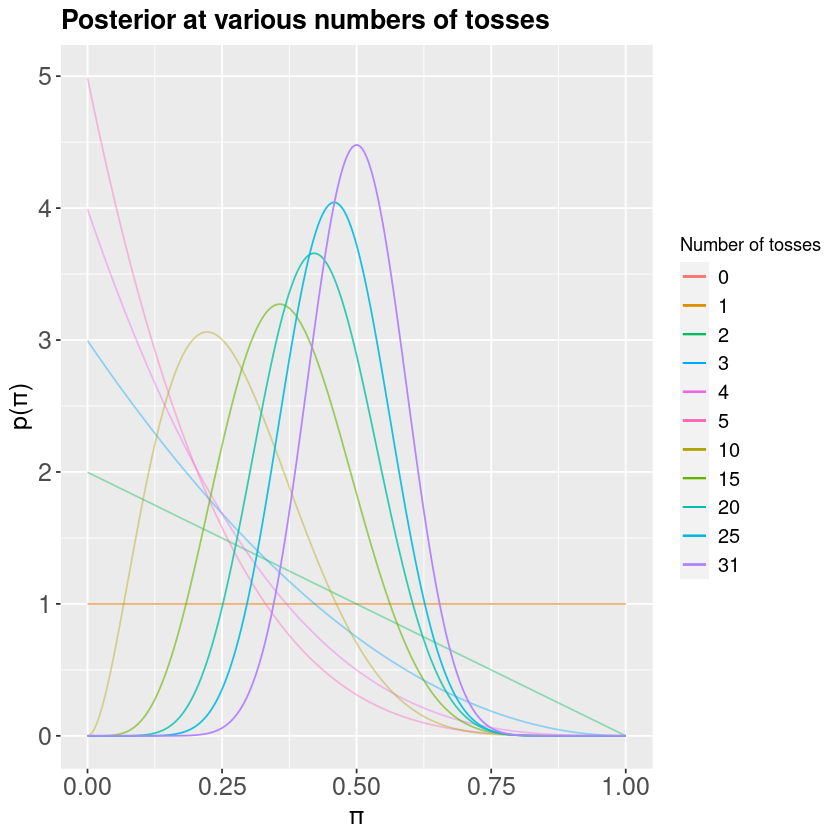

In [34]:
plot <- ggplot()

plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[1,2:1002])), color = "0"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[1,2:1002])), color = "1"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[2,2:1002])), color = "2"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[3,2:1002])), color = "3"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[4,2:1002])), color = "4"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[5,2:1002])), color = "5"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[10,2:1002])), color = "10"), alpha = 0.4)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[15,2:1002])), color = "15"), alpha = 0.6)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[20,2:1002])), color = "20"), alpha = 0.8)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[25,2:1002])), color = "25"), alpha = 0.9)
plot <- plot + geom_line(aes(x = xs, y = as.numeric(as.vector(df[31,2:1002])), color = "31"), alpha = 1.)

labels <- labs(color = "Number of tosses", x = "\u03c0", y = "p(\u03c0)")
plot + labels + theme + ggtitle("Posterior at various numbers of tosses")+  scale_color_discrete(breaks=c('0','1', '2', '3','4','5','10','15','20','25','31'))

Show how the most probable value and how the credibility interval change as a function of the number of coin tosses.

In [35]:
head(df,4)

,nTosses,0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,⋯,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,⋯,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1
2,1,1.998002,1.996004,1.994006,1.992008,1.990010,1.988012,1.986014,1.984016,1.982018,⋯,1.798202e-02,1.598402e-02,1.398601e-02,1.198801e-02,9.990010e-03,7.992008e-03,5.994006e-03,3.996004e-03,1.998002e-03,0
3,2,2.995505,2.989517,2.983535,2.977559,2.971589,2.965625,2.959667,2.953715,2.947769,⋯,2.426359e-04,1.917123e-04,1.467798e-04,1.078382e-04,7.488763e-05,4.792808e-05,2.695955e-05,1.198202e-05,2.995505e-06,0
4,3,3.992012,3.980048,3.968108,3.956192,3.944299,3.932431,3.920586,3.908765,3.896968,⋯,2.910177e-06,2.043910e-06,1.369260e-06,8.622746e-07,4.990015e-07,2.554888e-07,1.077843e-07,3.193610e-08,3.992012e-09,0


In [36]:
#Find point of max probability for each posterior and find limits of CI
most_likely <- c()
CI_lower <- c()
CI_upper <- c()
for(i in 1:31){
    most_likely <- c(most_likely, (which.max(as.numeric(as.vector(df[i,2:1002])))-1)/1000)#The -2 is because the first element in each row is the counter
}

for(i in 1:31){
    indexLower <- 2
    indexUpper <- 1002
    for(index in 2:1002){
        if(sum(as.numeric(as.vector(df[i,2:index])))*0.001 >= 0.025){
            break
        } 
    }
    CI_lower <- c(CI_lower, index/1000)
    
    index <- 1001
    for(index in seq(from = 1001, to = 1, by = -1)){
        if(sum(as.numeric(as.vector(df[i,index:1001])))*0.001 >= 0.025){
            break
        } 
    }
    CI_upper <- c(CI_upper,index/1000)
}

In [37]:
length(CI_upper)
length(CI_lower)
length(most_likely)

[1] 31

[1] 31

[1] 31

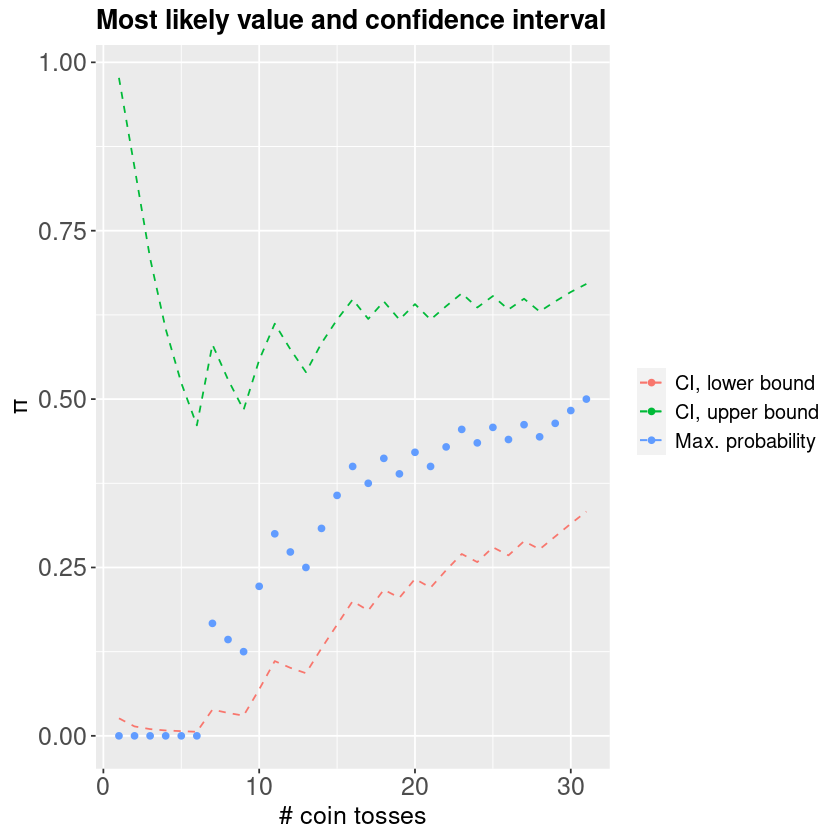

In [38]:
plot <- ggplot() + geom_point(aes(x = 1:31, y = most_likely, color = "Max. probability"))
plot <- plot + geom_line(aes(x = 1:31, y = CI_lower,color = "CI, lower bound") , linetype = "dashed") + geom_line(aes(x = 1:31, y = CI_upper, color = "CI, upper bound"), linetype = "dashed")
labels <- labs(color = NULL, x = "# coin tosses", y = "\u03c0")
plot + labels + theme + ggtitle("Most likely value and confidence interval")

#### Does the final result change?

In [39]:
most_likely[length(most_likely)]
ans

[1] 0.5

[1] 0.5

In [40]:
df_sequential <- data.frame(c(CI_lower[length(CI_lower)],CI_upper[length(CI_upper)]))
df_sequential <- t(df_sequential)
colnames(df_sequential) <- c("Lower bound", "Upper bound")
rownames(df_sequential) <- c(NULL)
df_sequential

Lower bound,Upper bound
0.333,0.671


In [41]:
df_CI

,Lower bound,Upper bound
CI,0.3354597,0.6645403


#### There is a slight ($\sim 10^{-3}$) relative difference in the bounds, probably due to the different ways in which the bound was found (inverting the `integrate` function vs. discretizing the $x$ axis and performing a sum). In both cases, the value of highest probability is $x=0.5$.


### Exercise 4 - Six Boxes Toy Model : inference


#### Randomly pick a box and a ball inside the box, as described in the experiment. Print the probability of each box and plot it as a function of the number of picks.

In [49]:
#Randomly choose one of the six boxes --> nWhite = {0,1,2,3,4,5}
nBox <- sample(c(0,1,2,3,4,5),1)

#1 is white, 0 is black; Box i contains i white balls
nSamples <- 1000
samples <- rbinom(nSamples,1,nBox/5)

In [50]:
print(paste("We are working with box ",nBox, " which contains ", nBox ," white balls"))

[1] "We are working with box  4  which contains  4  white balls"


#### Initialize all probabilities as $1/6$, as we don't know anything yet about the selected box.

In [51]:
probabilities = as.data.frame(matrix(nrow=1,ncol=6))
colnames(probabilities) <- c("Box0","Box1","Box2","Box3","Box4","Box5")
probabilities[1,] <- rep(1/6,6)
probabilities

Box0,Box1,Box2,Box3,Box4,Box5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667


#### Update probability using Bayes theorem $p(B_i|W^n) \propto p(W^n|B_i)p(B_i|W^{n-1})$

In [52]:
for(sample in samples){ 
    new_probabilities <- list()
    for(i in 0:5){ #If sample = 0 --> probability is (5-nBox)/5; if sample = 1 --> probability is nBox/5
        p <- ifelse(sample==0, (5-i)/5,i/5)*probabilities[nrow(probabilities),][i+1]
        new_probabilities[i+1] <- p
    }
    new_probabilities <- unlist(new_probabilities)
    new_probabilities <- new_probabilities/sum(new_probabilities)

    probabilities[nrow(probabilities)+1,] <- new_probabilities
}

#### Show the probability of selecting each box

I only show the head and tail of the dataframe since there are so many samples.

In [53]:
head(probabilities,10)

,Box0,Box1,Box2,Box3,Box4,Box5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1666667,1.666667e-01,0.166666667,0.1666667,0.1666667,0.1666667
2,0.0000000,6.666667e-02,0.133333333,0.2000000,0.2666667,0.3333333
3,0.0000000,2.000000e-01,0.300000000,0.3000000,0.2000000,0.0000000
4,0.0000000,8.000000e-02,0.240000000,0.3600000,0.3200000,0.0000000
5,0.0000000,2.739726e-02,0.164383562,0.3698630,0.4383562,0.0000000
6,0.0000000,8.510638e-03,0.102127660,0.3446809,0.5446809,0.0000000
7,0.0000000,2.484472e-03,0.059627329,0.3018634,0.6360248,0.0000000
8,0.0000000,6.956522e-04,0.033391304,0.2535652,0.7123478,0.0000000
9,0.0000000,1.891611e-04,0.018159463,0.2068476,0.7748037,0.0000000


In [54]:
tail(probabilities,10)

,Box0,Box1,Box2,Box3,Box4,Box5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
992,0,0,1.223702e-142,6.388916e-39,1,0
993,0,0,3.671106e-142,1.277783e-38,1,0
994,0,0,1.835553e-142,9.583375e-39,1,0
995,0,0,9.177764e-143,7.187531e-39,1,0
996,0,0,2.753329e-142,1.437506e-38,1,0
997,0,0,1.376665e-142,1.078130e-38,1,0
998,0,0,6.883323e-143,8.085972e-39,1,0
999,0,0,3.441662e-143,6.064479e-39,1,0
1000,0,0,1.032498e-142,1.212896e-38,1,0


#### Make a plot of the probability of each box

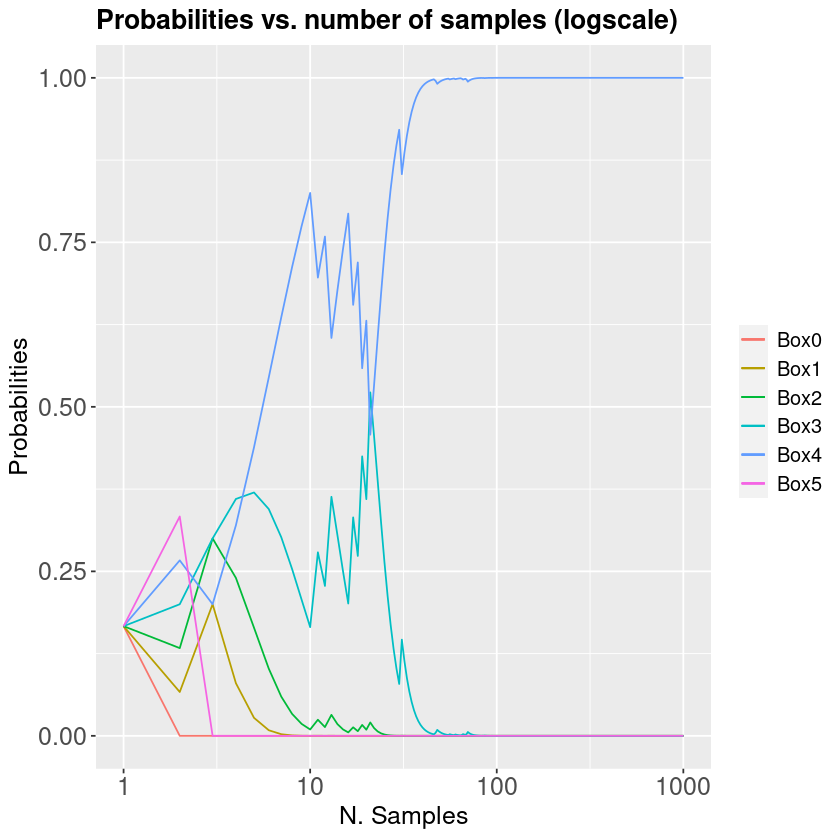

In [55]:
plot <- ggplot()

plot <- plot + geom_line(mapping = aes(x = 1:nrow(probabilities), y = probabilities$"Box0", color = "Box0"))
plot <- plot + geom_line(mapping = aes(x = 1:nrow(probabilities), y = probabilities$"Box1", color = "Box1"))
plot <- plot + geom_line(mapping = aes(x = 1:nrow(probabilities), y = probabilities$"Box2", color = "Box2"))
plot <- plot + geom_line(mapping = aes(x = 1:nrow(probabilities), y = probabilities$"Box3", color = "Box3"))
plot <- plot + geom_line(mapping = aes(x = 1:nrow(probabilities), y = probabilities$"Box4", color = "Box4"))
plot <- plot + geom_line(mapping = aes(x = 1:nrow(probabilities), y = probabilities$"Box5", color = "Box5"))

title <- ggtitle("Probabilities vs. number of samples (logscale)")

plot+theme+labs(x = "N. Samples", y = "Probabilities", color = NULL) + scale_x_continuous(trans='log10') + title

#### We see that, as the number of samples increases, the probability sets to $0$ for the wrong boxes and to $1$ for the correct box.